In [2]:
import os
import zipfile
import pandas as pd

In [2]:
outputDir = "data"

if not os.path.exists(outputDir) or not os.listdir(outputDir):
    with zipfile.ZipFile("data.zip", 'r') as zip_ref:
        zip_ref.extractall("")
    print("📝 Archivo descomprimido.")
else:
    print("📝 El archivo ya está descomprimido.")

📝 Archivo descomprimido.


### 📩 Carga de los datos

In [3]:
#dataTrain_timestamp = pd.read_csv('data/dataTrain_balanced_timestamp.csv')
dataTrain = pd.read_csv('data/dataTrain_balanced.csv')
dataTrain
dataTest = pd.read_csv('data/test_cleaned_data.csv')
dataTest

,Unnamed: 0.1,Unnamed: 0,user_id,age_range,gender,merchant_id,label,item_id,category_id,brand_id,time_stamp,action_type,clicks,add_to_cart,purchases,add_to_favorites,total_actions,unique_item_count
0,0,0,163968,0.0,0.0,4378,-1.0,101206,812,6968,"DatetimeIndex(['2023-06-14'], dtype='datetime6...",0,1,0,0,0,1,1
1,1,1,163968,0.0,0.0,2300,-1.0,588758,844,3833,"DatetimeIndex(['2023-06-18', '2023-11-11', '20...",0,9,0,2,0,11,4
2,2,2,163968,0.0,0.0,1551,-1.0,312747,243,1954,"DatetimeIndex(['2023-06-27', '2023-06-27', '20...",0,4,0,1,0,5,1
3,3,3,163968,0.0,0.0,4343,-1.0,932390,1612,3201,"DatetimeIndex(['2023-06-28'], dtype='datetime6...",0,1,0,0,0,1,1
4,4,4,163968,0.0,0.0,4911,-1.0,957657,662,3089,"DatetimeIndex(['2023-06-12'], dtype='datetime6...",0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332995,3332995,3332995,7162,0.0,0.0,3969,-1.0,766760,737,483,"DatetimeIndex(['2023-05-21', '2023-06-03', '20...",0,3,0,0,0,3,1
3332996,3332996,3332996,7162,0.0,0.0,4739,-1.0,938678,389,5878,"DatetimeIndex(['2023-11-09'], dtype='datetime6...",0,1,0,0,0,1,1
3332997,3332997,3332997,7162,0.0,0.0,406,-1.0,590275,737,3616,"DatetimeIndex(['2023-09-16'], dtype='datetime6...",0,1,0,0,0,1,1
3332998,3332998,3332998,7162,0.0,0.0,3234,-1.0,746404,737,5353,"DatetimeIndex(['2023-07-13', '2023-07-13'], dt...",0,2,0,0,0,2,1


In [4]:
dataTrain = dataTrain.drop(columns=['Unnamed: 0.1'])
dataTest = dataTest.drop(columns=['Unnamed: 0.1'])
dataTest = dataTest.drop(columns=['Unnamed: 0'])

In [16]:
dataTrain

,user_id,age_range,gender,merchant_id,item_id,category_id,brand_id,clicks,add_to_cart,purchases,add_to_favorites,total_actions,unique_item_count,label
0,34176,6.000000,0.000000,944,408895,1505,7370,1,0,0,0,1,1,-1
1,34176,6.000000,0.000000,412,17235,1604,4396,8,0,0,0,8,7,-1
2,34176,6.000000,0.000000,1945,231901,662,2758,7,0,0,0,7,3,-1
3,34176,6.000000,0.000000,4752,174142,821,6938,1,0,0,0,1,1,-1
4,34176,6.000000,0.000000,643,716371,1505,968,0,0,0,1,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20300806,370527,1.153760,0.000000,3106,784544,505,1585,6,0,1,0,7,2,1
20300807,54019,0.454884,0.000000,3721,792286,817,4730,28,0,1,0,30,12,1
20300808,290457,3.621730,0.000000,1378,319129,763,5636,1,0,1,0,2,1,1
20300809,379183,2.118076,0.881924,1946,603389,1054,4322,3,0,1,0,4,1,1


### Modelos

In [1]:

print(xgb.__version__)


2.1.2


In [5]:
import pandas as pd
import xgboost as xgb
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def calculateRfm(data):
    rfm = data.groupby('user_id').agg({
        'total_actions': 'sum',   
        'clicks': 'count',        
        'purchases': 'sum'        
    }).reset_index()

    rfm.columns = ['user_id', 'recency', 'frequency', 'monetary']
    
    rfm['rRank'] = pd.qcut(rfm['recency'], 4, labels=[4, 3, 2, 1])  
    rfm['fRank'] = pd.qcut(rfm['frequency'], 4, labels=[1, 2, 3, 4])  
    rfm['mRank'] = pd.qcut(rfm['monetary'], 4, labels=[1, 2, 3, 4])

    rfm['rfmScore'] = rfm['rRank'].astype(str) + rfm['fRank'].astype(str) + rfm['mRank'].astype(str)
    
    return rfm

rfmTrain = calculateRfm(dataTrain)
dataTrain = pd.merge(dataTrain, rfmTrain, on='user_id')

# Reemplazar -1 con 2 en la columna 'label'
dataTrain['label'] = dataTrain['label'].replace(-1, 2)

rfmTest = calculateRfm(dataTest)
dataTest = pd.merge(dataTest, rfmTest, on='user_id')
dataTest['label'] = dataTest['label'].replace(-1, 2)

In [9]:
# Tabla de frecuencia de la columna 'label'
frequency_table = dataTrain['label'].value_counts().reset_index()
frequency_table.columns = ['Label', 'Frequency']
frequency_table['Percentage'] = (frequency_table['Frequency'] / frequency_table['Frequency'].sum()) * 100

print(frequency_table)


   Label  Frequency  Percentage
0      2    6766937   33.333333
1      0    6766937   33.333333
2      1    6766937   33.333333


In [6]:
import xgboost as xgb
print(xgb.config_context())


In [31]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Selección de características
features = ['recency', 'frequency', 'monetary', 'age_range', 'gender', 'clicks', 'purchases', 'add_to_cart', 'add_to_favorites', 'total_actions']

# Separación de características y etiquetas en el conjunto de entrenamiento
xTrain = dataTrain[features]
yTrain = dataTrain['label']

# Separación de características y etiquetas en el conjunto de prueba
xTest = dataTest[features]
yTest = dataTest['label']  # Asegúrate de que el conjunto de prueba contiene la columna 'label'

# Configuración del modelo XGBClassifier básico
xgbModel_basic = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    tree_method='gpu_hist',
    num_class=3
)

# Entrenamiento del modelo
xgbModel_basic.fit(xTrain, yTrain)

# Evaluación del modelo en el conjunto de prueba
yPred = xgbModel_basic.predict(xTest)
accuracy = accuracy_score(yTest, yPred)
print(f"🔍 Precisión en conjunto de prueba: {accuracy:.4f}")
print("\n🔎 Clasificación detallada:")
print(classification_report(yTest, yPred))
print("\n🔎 Matriz de confusión:")
print(confusion_matrix(yTest, yPred))

# Guardar el modelo entrenado
joblib.dump(xgbModel_basic, 'xgbModelBasic.pkl')
print("🎉 Modelo básico guardado como 'xgbModelBasic.pkl'")

c:\Documentos\Semestre8\DataScience\Proyectos\Proyecto2DS\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:24:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
c:\Documentos\Semestre8\DataScience\Proyectos\Proyecto2DS\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:24:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Documentos\Semestre8\DataScience\Proyectos\Proyecto2DS\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:24:48] WARNING: C:\buildkite-agent\builds\b

🔍 Precisión en conjunto de prueba: 0.9624

🔎 Clasificación detallada:


c:\Documentos\Semestre8\DataScience\Proyectos\Proyecto2DS\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Documentos\Semestre8\DataScience\Proyectos\Proyecto2DS\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Documentos\Semestre8\DataScience\Proyectos\Proyecto2DS\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.96      0.98   3333000

    accuracy                           0.96   3333000
   macro avg       0.33      0.32      0.33   3333000
weighted avg       1.00      0.96      0.98   3333000


🔎 Matriz de confusión:
[[      0       0       0]
 [      0       0       0]
 [ 114575   10862 3207563]]
🎉 Modelo básico guardado como 'xgbModelBasic.pkl'


In [39]:
dataTrain

,Unnamed: 0.1,user_id,age_range,gender,merchant_id,item_id,category_id,brand_id,clicks,add_to_cart,...,total_actions,unique_item_count,label,recency,frequency,monetary,rRank,fRank,mRank,rfmScore
0,0,34176,6.000000,0.000000,944,408895,1505,7370,1,0,...,1,1,2,668,135,66,1,4,4,144
1,1,34176,6.000000,0.000000,412,17235,1604,4396,8,0,...,8,7,2,668,135,66,1,4,4,144
2,2,34176,6.000000,0.000000,1945,231901,662,2758,7,0,...,7,3,2,668,135,66,1,4,4,144
3,3,34176,6.000000,0.000000,4752,174142,821,6938,1,0,...,1,1,2,668,135,66,1,4,4,144
4,4,34176,6.000000,0.000000,643,716371,1505,968,0,0,...,1,1,2,668,135,66,1,4,4,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20300806,1860217,370527,1.153760,0.000000,3106,784544,505,1585,6,0,...,7,2,1,251,33,30,4,2,1,421
20300807,3826656,54019,0.454884,0.000000,3721,792286,817,4730,28,0,...,30,12,1,551,51,56,2,3,4,234
20300808,3368080,290457,3.621730,0.000000,1378,319129,763,5636,1,0,...,2,1,1,297,49,40,4,3,2,432
20300809,6412511,379183,2.118076,0.881924,1946,603389,1054,4322,3,0,...,4,1,1,634,48,52,1,3,4,134


In [8]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Selección de características
features = ['recency', 'frequency', 'monetary', 'age_range', 'gender', 'clicks', 'purchases', 'add_to_cart', 'add_to_favorites', 'total_actions']

# Separación de características y etiquetas
x_train = dataTrain[features]
y_train = dataTrain['label']

x_test = dataTest[features]
y_test = dataTest['label']

# División en conjunto de entrenamiento y validación
x_train_split, x_val, y_train_split, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Convertir los datos a DMatrix, que es compatible con early stopping
dtrain = xgb.DMatrix(x_train_split, label=y_train_split)
dval = xgb.DMatrix(x_val, label=y_val)
dtest = xgb.DMatrix(x_test)

# Configuración de los parámetros del modelo
params = {
    'objective': 'multi:softmax',  # Para clasificación multiclase
    'num_class': 3,  # Cambia según el número de clases que tengas
    'eval_metric': 'mlogloss',
    'max_depth': 5,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
}

# Entrenamiento del modelo con early stopping
evals = [(dtrain, 'train'), (dval, 'eval')]
xgb_model = xgb.train(params, dtrain, num_boost_round=100, evals=evals, early_stopping_rounds=10, verbose_eval=True)

# Predicción y evaluación en conjunto de validación
y_val_pred = xgb_model.predict(dval)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"🔍 Precisión en validación (con early stopping): {val_accuracy:.4f}")
print("\n🔎 Clasificación detallada en validación:")
print(classification_report(y_val, y_val_pred))
print("\n🔎 Matriz de confusión en validación:")
print(confusion_matrix(y_val, y_val_pred))

# Evaluación en el conjunto de prueba
y_test_pred = xgb_model.predict(dtest)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\n🔍 Precisión en prueba: {test_accuracy:.4f}")
print("\n🔎 Clasificación detallada en prueba:")
print(classification_report(y_test, y_test_pred))
print("\n🔎 Matriz de confusión en prueba:")
print(confusion_matrix(y_test, y_test_pred))

# Guardar el modelo entrenado
joblib.dump(xgb_model, 'xgbModelEarlyStopping.pkl')
print("🎉 Modelo con early stopping guardado como 'xgbModelEarlyStopping.pkl'")


[0]	train-mlogloss:1.03423	eval-mlogloss:1.03419
[1]	train-mlogloss:0.98041	eval-mlogloss:0.98032
[2]	train-mlogloss:0.94153	eval-mlogloss:0.94142
[3]	train-mlogloss:0.90035	eval-mlogloss:0.90021
[4]	train-mlogloss:0.86456	eval-mlogloss:0.86440
[5]	train-mlogloss:0.83634	eval-mlogloss:0.83617
[6]	train-mlogloss:0.80851	eval-mlogloss:0.80832
[7]	train-mlogloss:0.78380	eval-mlogloss:0.78360
[8]	train-mlogloss:0.76257	eval-mlogloss:0.76235
[9]	train-mlogloss:0.74300	eval-mlogloss:0.74277
[10]	train-mlogloss:0.72642	eval-mlogloss:0.72618
[11]	train-mlogloss:0.71309	eval-mlogloss:0.71286
[12]	train-mlogloss:0.69911	eval-mlogloss:0.69887
[13]	train-mlogloss:0.68603	eval-mlogloss:0.68578
[14]	train-mlogloss:0.67392	eval-mlogloss:0.67367
[15]	train-mlogloss:0.66275	eval-mlogloss:0.66251
[16]	train-mlogloss:0.65356	eval-mlogloss:0.65331
[17]	train-mlogloss:0.64485	eval-mlogloss:0.64460
[18]	train-mlogloss:0.63663	eval-mlogloss:0.63639
[19]	train-mlogloss:0.62914	eval-mlogloss:0.62889
[20]	train

c:\Documentos\Semestre8\DataScience\Proyectos\Proyecto2DS\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Documentos\Semestre8\DataScience\Proyectos\Proyecto2DS\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Documentos\Semestre8\DataScience\Proyectos\Proyecto2DS\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.92      0.96   3333000

    accuracy                           0.92   3333000
   macro avg       0.33      0.31      0.32   3333000
weighted avg       1.00      0.92      0.96   3333000


🔎 Matriz de confusión en prueba:
[[      0       0       0]
 [      0       0       0]
 [ 213270   45728 3074002]]
🎉 Modelo con early stopping guardado como 'xgbModelEarlyStopping.pkl'


In [10]:
# Tabla de frecuencia de la columna 'label' en dataTrain
frequency_table = dataTrain['label'].value_counts().reset_index()
frequency_table.columns = ['Label', 'Frequency']
frequency_table['Percentage'] = (frequency_table['Frequency'] / frequency_table['Frequency'].sum()) * 100

print(frequency_table)


   Label  Frequency  Percentage
0      2    6766937   33.333333
1      0    6766937   33.333333
2      1    6766937   33.333333


In [7]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Selección de características
features = ['recency', 'frequency', 'monetary', 'age_range', 'gender', 'clicks', 'purchases', 'add_to_cart', 'add_to_favorites', 'total_actions']

# Separación de características y etiquetas
x = dataTrain[features]
y = dataTrain['label']

# División en conjunto de entrenamiento y validación
xTrain, xVal, yTrain, yVal = train_test_split(x, y, test_size=0.2, random_state=42)

# Convertir los datos a DMatrix, que es compatible con early stopping
dtrain = xgb.DMatrix(xTrain, label=yTrain)
dval = xgb.DMatrix(xVal, label=yVal)

# Configuración de los parámetros del modelo
params = {
    'objective': 'multi:softmax',  # Para clasificación multiclase
    'num_class': 3,
    'eval_metric': 'mlogloss',
    'max_depth': 5,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
}

# Entrenamiento del modelo con early stopping
evals = [(dtrain, 'train'), (dval, 'eval')]
xgb_model = xgb.train(params, dtrain, num_boost_round=100, evals=evals, early_stopping_rounds=10, verbose_eval=True)

# Predicción y evaluación
yPred = xgb_model.predict(dval)
accuracy = accuracy_score(yVal, yPred)
print(f"🔍 Precisión en validación (con early stopping): {accuracy:.4f}")
print("\n🔎 Clasificación detallada:")
print(classification_report(yVal, yPred))
print("\n🔎 Matriz de confusión:")
print(confusion_matrix(yVal, yPred))

# Guardar el modelo entrenado
joblib.dump(xgb_model, 'xgbModelEarlyStopping.pkl')
print("🎉 Modelo con early stopping guardado como 'xgbModelEarlyStopping.pkl'")

KeyboardInterrupt: 

In [17]:
dataTrain.head()

,Unnamed: 0.1,user_id,age_range,gender,merchant_id,item_id,category_id,brand_id,clicks,add_to_cart,purchases,add_to_favorites,total_actions,unique_item_count,label
0,0,34176,6.0,0.0,944,408895,1505,7370,1,0,0,0,1,1,-1
1,1,34176,6.0,0.0,412,17235,1604,4396,8,0,0,0,8,7,-1
2,2,34176,6.0,0.0,1945,231901,662,2758,7,0,0,0,7,3,-1
3,3,34176,6.0,0.0,4752,174142,821,6938,1,0,0,0,1,1,-1
4,4,34176,6.0,0.0,643,716371,1505,968,0,0,0,1,1,1,-1


In [22]:
print("Data Train Timestamp\n")
dataTrain_timestamp.info()
dataTrain_timestamp.count()

print("\nData Train without Timestamp\n")
dataTrain.info()
dataTrain.count()

Data Train Timestamp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20300811 entries, 0 to 20300810
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0.1       int64  
 1   user_id            int64  
 2   age_range          float64
 3   gender             float64
 4   merchant_id        int64  
 5   item_id            int64  
 6   category_id        int64  
 7   brand_id           int64  
 8   clicks             int64  
 9   add_to_cart        int64  
 10  purchases          int64  
 11  add_to_favorites   int64  
 12  total_actions      int64  
 13  unique_item_count  int64  
 14  label              int64  
 15  time_stamp         object 
dtypes: float64(2), int64(13), object(1)
memory usage: 2.4+ GB

Data Train without Timestamp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20300811 entries, 0 to 20300810
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 

Unnamed: 0.1         20300811
user_id              20300811
age_range            20300811
gender               20300811
merchant_id          20300811
item_id              20300811
category_id          20300811
brand_id             20300811
clicks               20300811
add_to_cart          20300811
purchases            20300811
add_to_favorites     20300811
total_actions        20300811
unique_item_count    20300811
label                20300811
dtype: int64

In [19]:
dataTrain.describe()

,Unnamed: 0.1,user_id,age_range,gender,merchant_id,item_id,category_id,brand_id,clicks,add_to_cart,purchases,add_to_favorites,total_actions,unique_item_count,label
count,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07
mean,3.513824e+06,2.116874e+05,3.037811e+00,3.359498e-01,2.512599e+03,5.559079e+05,8.667681e+02,4.163890e+03,8.630119e+00,5.517021e-06,9.027854e-01,3.033002e-01,1.008873e+01,4.353554e+00,0.000000e+00
std,2.027742e+06,1.215602e+05,1.710790e+00,4.892762e-01,1.287225e+03,3.217158e+05,3.902042e+02,2.163676e+03,2.279894e+01,2.410922e-03,8.730307e-01,1.382527e+00,2.359851e+01,8.344923e+00,8.164966e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.765179e+06,1.056220e+05,2.000000e+00,0.000000e+00,1.480000e+03,2.750960e+05,5.960000e+02,2.368000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,-1.000000e+00
50%,3.513432e+06,2.122770e+05,3.000000e+00,0.000000e+00,2.492000e+03,5.548880e+05,8.490000e+02,4.073000e+03,4.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,5.000000e+00,2.000000e+00,0.000000e+00
75%,5.261091e+06,3.166630e+05,4.000000e+00,7.078987e-01,3.596000e+03,8.307000e+05,1.180000e+03,5.910000e+03,9.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.100000e+01,4.000000e+00,1.000000e+00
max,7.030722e+06,4.241700e+05,8.000000e+00,2.000000e+00,4.995000e+03,1.113166e+06,1.671000e+03,8.477000e+03,6.962000e+03,2.000000e+00,2.020000e+02,3.980000e+02,6.963000e+03,1.194000e+03,1.000000e+00


C:\Users\acer\AppData\Local\Temp\ipykernel_8364\2748666227.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chunk['time_stamp'] = pd.to_datetime(chunk['time_stamp'], errors='coerce')
C:\Users\acer\AppData\Local\Temp\ipykernel_8364\2748666227.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chunk['time_stamp'] = pd.to_datetime(chunk['time_stamp'], errors='coerce')
C:\Users\acer\AppData\Local\Temp\ipykernel_8364\2748666227.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chunk['time_stamp'] = pd.to_datetime(chunk['time_stamp'], errors='coerce')
C:\Users\acer\AppDa

Accuracy: 0.7037695284647439
Confusion Matrix:
[[1330628    4992   18263]
 [  98931  857733  396373]
 [  51012  633173  669058]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.90      0.98      0.94   1353883
           0       0.57      0.63      0.60   1353037
           1       0.62      0.49      0.55   1353243

    accuracy                           0.70   4060163
   macro avg       0.70      0.70      0.70   4060163
weighted avg       0.70      0.70      0.70   4060163



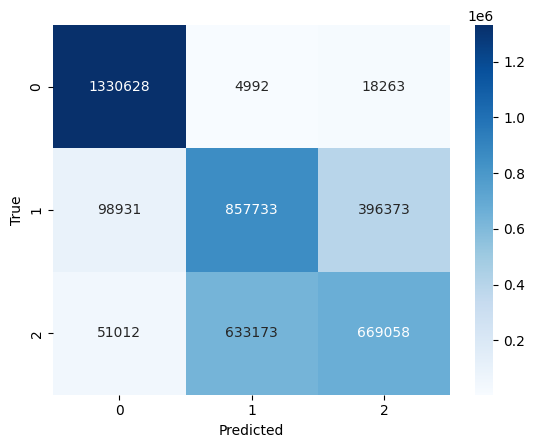

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Función para reducir el uso de memoria ajustando los tipos de datos
def reduce_mem_usage(df):
    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()

            if str(col_type).startswith('int'):
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                else:
                    df[col] = df[col].astype(np.int64)
            else:
                df[col] = df[col].astype(np.float32)

    return df

# Definir el tamaño del chunk
chunk_size = 100000  # Puedes ajustar este tamaño según tu memoria disponible

# Leer el dataset por fragmentos y procesarlo
data_chunks = pd.read_csv('data/dataTrain_balanced_timestamp.csv', chunksize=chunk_size, usecols=[
    'user_id', 'age_range', 'gender', 'merchant_id', 'item_id', 'category_id', 
    'brand_id', 'clicks', 'add_to_cart', 'purchases', 'add_to_favorites', 
    'total_actions', 'unique_item_count', 'label', 'time_stamp'
])

# Lista para almacenar los chunks procesados
data_list = []

for chunk in data_chunks:
    # Reducir el uso de memoria en cada chunk
    chunk = reduce_mem_usage(chunk)

    # Convertir la columna 'time_stamp' a tipo datetime
    chunk['time_stamp'] = pd.to_datetime(chunk['time_stamp'], errors='coerce')

    # Codificar las columnas categóricas con LabelEncoder
    le = LabelEncoder()
    chunk['gender'] = le.fit_transform(chunk['gender'].astype(str))
    chunk['age_range'] = le.fit_transform(chunk['age_range'].astype(str))

    # Agregar el chunk procesado a la lista
    data_list.append(chunk)

# Concatenar todos los chunks procesados
dataTrain_timestamp = pd.concat(data_list, axis=0)

# Definir características (X) y etiqueta (y)
X = dataTrain_timestamp.drop(columns=['label', 'time_stamp'])  # Excluir 'label' y 'time_stamp'
y = dataTrain_timestamp['label']

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instanciar el modelo de Regresión Logística
model = LogisticRegression(max_iter=1000)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Imprimir resultados
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Visualización de la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
